## 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. If your group consists of students from different classes, upload in **both** classes.

1. First we need to remove all the redundant columns. Please keep the following 22 columns and remove all others:

    id\
    name  
    host_id  
    host_name  
    neighbourhood_cleansed  
    latitude  
    longitude  
    room_type  
    price  
    minimum_nights  
    number_of_reviews  
    last_review  
    review_scores_rating  
    review_scores_accuracy  
    review_scores_cleanliness  
    review_scores_checkin  
    review_scores_communication  
    review_scores_location  
    review_scores_value  
    reviews_per_month  
    calculated_host_listings_count  
    availability_365



2. Next we have to handle missing values. Remove all rows where `number_of_reviews = 0`. If there are still missing values, remove the rows that contain them so you have a data set with no missing values.

3. Fix the `neighbourhood_cleansed` values (some are missing 'æ ø å'), and if necessary change the price to DKK.

4. Create a fitting word cloud based on the `name` column. Feel free to remove non-descriptive stop words (e.g. since this is about Copenhagen, perhaps the word 'Copenhagen' is redundant).

5. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

6. Create a new column using bins of price. Use 11 bins, evenly distributed but with the last bin $> 10,000$.

7. Using non-scaled versions of latitude and longitude, plot the listings data on a map. Use the newly created price bins as a color parameter. Also, create a plot (i.e. another plot) where you group the listings with regard to the neighbourhood.

8. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

9. Create a bar chart of the hosts with the top ten most listings. Place host id on the x-axis and the count of listings on the y-axis.

10. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

11. Supply a list of the top 10 highest rated listings and visualize them on a map.

12. Now, use any preprocessing and feature engineering steps that you find relevant before proceeding (optional).

13. Create another new column, where the price is divided into two categories: "expensive" listings defined by all listings with a price higher than the median price, and "affordable" listings defined by all listings with a price equal to or below the median price. You can encode the affordable listings as "0" and the expensive ones as "1". All listings should now have a classification indicating either expensive listings (1) or affordable listings (0).

14. Based on self-chosen features, develop a Naïve Bayes and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

15. Try to come up with a final conclusion to the Airbnb-Copenhagen assignment.


In [316]:
import pandas as pd
import sklearn as sk

# 1 Load and select columns

In [317]:
# load the data
data = pd.read_csv('listings_new.csv')
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]
data_limited.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,$803.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.03,1,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,"$2,600.00",7,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.51,1,261
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,"$1,401.00",4,...,4.88,4.92,4.85,4.96,4.98,4.76,4.78,0.87,1,42
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nrrebro,55.69388,12.54725,Entire home/apt,$793.00,5,...,4.91,4.86,4.92,4.90,4.94,4.89,4.80,0.69,1,5
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,"$3,350.00",3,...,4.56,4.64,4.45,4.79,4.72,4.89,4.61,2.11,10,109


# 2 Handle missing values

In [318]:
# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nrrebro,55.68641,12.54741,Entire home/apt,$803.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.03,1,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,"$2,600.00",7,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.51,1,261
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,"$1,401.00",4,...,4.88,4.92,4.85,4.96,4.98,4.76,4.78,0.87,1,42
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nrrebro,55.69388,12.54725,Entire home/apt,$793.00,5,...,4.91,4.86,4.92,4.90,4.94,4.89,4.80,0.69,1,5
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,"$3,350.00",3,...,4.56,4.64,4.45,4.79,4.72,4.89,4.61,2.11,10,109


# 3 Fix 'neighbourhood_cleansed'

In [319]:
# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
print(neighbourhoods)

# replace Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
print(neighbourhoods)

['Nrrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Amager Vest' 'sterbro'
 'Frederiksberg' 'Bispebjerg' 'Valby' 'Amager st' 'Vanlse' 'Brnshj-Husum']
['Nørrebro' 'Indre By' 'Vesterbro-Kongens Enghave' 'Amager Vest'
 'Østerbro' 'Frederiksberg' 'Bispebjerg' 'Valby' 'Amager st' 'Vanløse'
 'Brønshøj-Husum']


In [320]:
# change values in price from $650 to 650, then multiply by 6.94 to get DKK

data_filtered["price"] = data_filtered["price"].str.replace('$', '')
data_filtered["price"] = data_filtered["price"].str.replace(',', '')
data_filtered["price"] = data_filtered["price"].astype(float)
data_filtered["price"] = data_filtered["price"] * 6.94
data_filtered.head()

/tmp/ipykernel_221444/3899755081.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_filtered["price"] = data_filtered["price"].str.replace('$', '')


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nørrebro,55.68641,12.54741,Entire home/apt,5572.82,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.03,1,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,18044.00,7,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.51,1,261
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,9722.94,4,...,4.88,4.92,4.85,4.96,4.98,4.76,4.78,0.87,1,42
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nørrebro,55.69388,12.54725,Entire home/apt,5503.42,5,...,4.91,4.86,4.92,4.90,4.94,4.89,4.80,0.69,1,5
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,23249.00,3,...,4.56,4.64,4.45,4.79,4.72,4.89,4.61,2.11,10,109


# 4 Wordcloud from AirBnB name

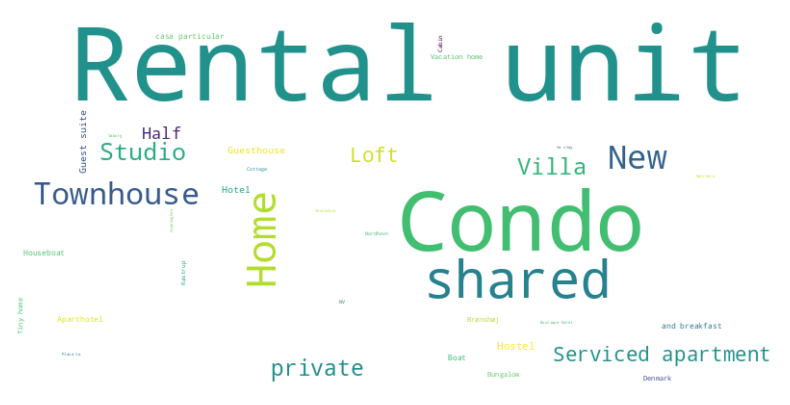

In [321]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# display a word cloud from the name column in data_filtered
text = ' '.join(data_filtered.name)

nono_words = ['Copenhagen', 'København','in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh','Ballerup','Hellerup','Valby','Vanløse','Brønhøj']

# need font path and upgrading Pillow to make it work on linux
# pip install --upgrade Pillow
# restart jupyter kernel after installing/upgrading Pillow

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nono_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


# 5 Wordcloud from host name

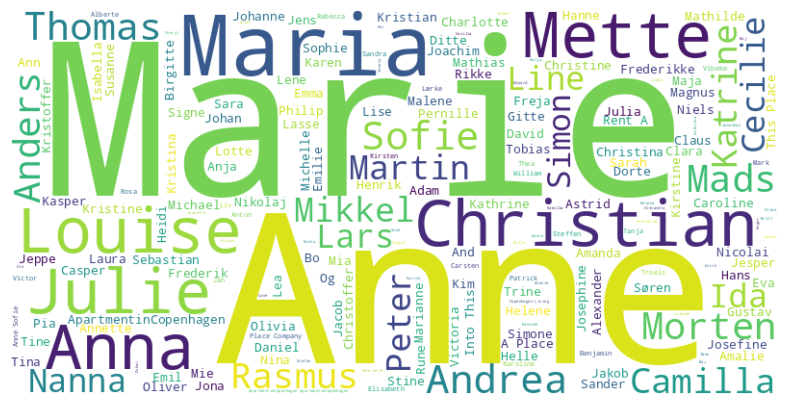

In [322]:
text = ' '.join(data_filtered['host_name'])

nono_words = []

# need font path and upgrading Pillow to make it work on linux
# pip install --upgrade Pillow
# restart jupyter kernel after installing/upgrading Pillow

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nono_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

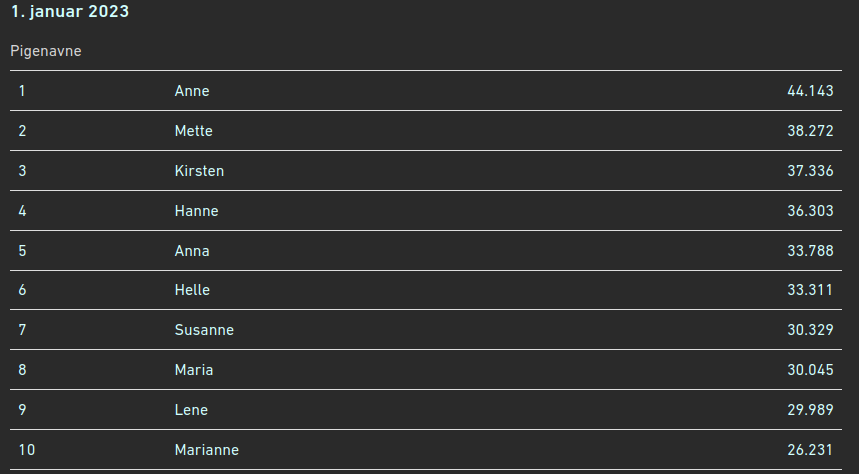

# 6 Bin the price

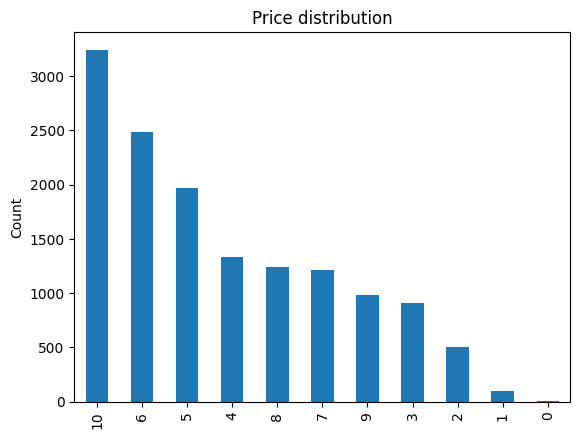

In [323]:
import numpy as np
# create 11 bins for the cost coulumn starting at 0 and having the 11th bin above 10000

# Define the bin edges
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, float('inf')]

data_bins = data_filtered
# Create a new column 'bins' with the bin edges
data_bins['price_bins'] = pd.cut(data_filtered['price'], bins=bin_edges, labels=False)

# Create a basic line plot
data_bins['price_bins'].value_counts().plot(kind='bar')


# Add lables and title
plt.ylabel('Count')
plt.title('Price distribution')

# Display the plot
plt.show()

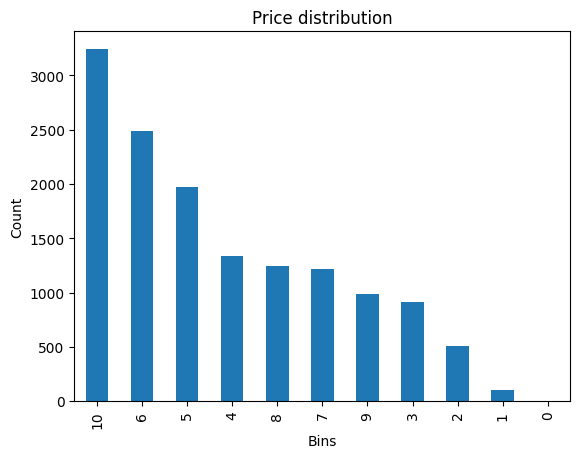

In [324]:
# Create a basic line plot
data_bins['price_bins'].value_counts().plot(kind='bar')

# Add labels and title
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Price distribution')

# Display the plot
plt.show()

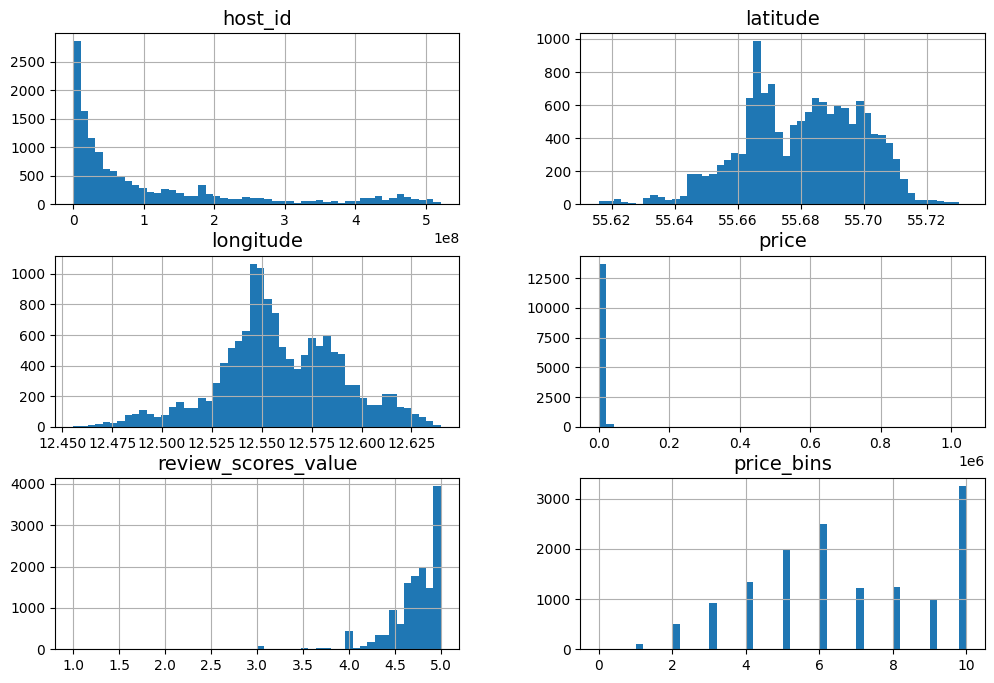

In [359]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# show these columnds
columns = ['host_id', 'latitude', 'longitude', 'price','review_scores_value','price_bins']

data_bins[columns].hist(bins=50, figsize=(12, 8))
plt.show()

# 7 Map plots

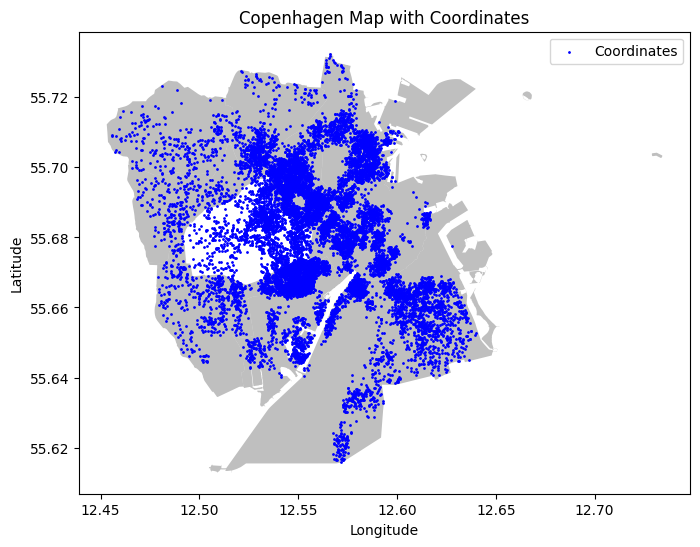

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Create a scatter plot of latitude and longitude
plt.figure(figsize=(10, 6))
copenhagen.plot(ax=plt.gca(), alpha=0.5, color='gray')
plt.scatter(data_bins['longitude'], data_bins['latitude'], c='blue', marker='o', label='Coordinates', s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Copenhagen Map with Coordinates')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


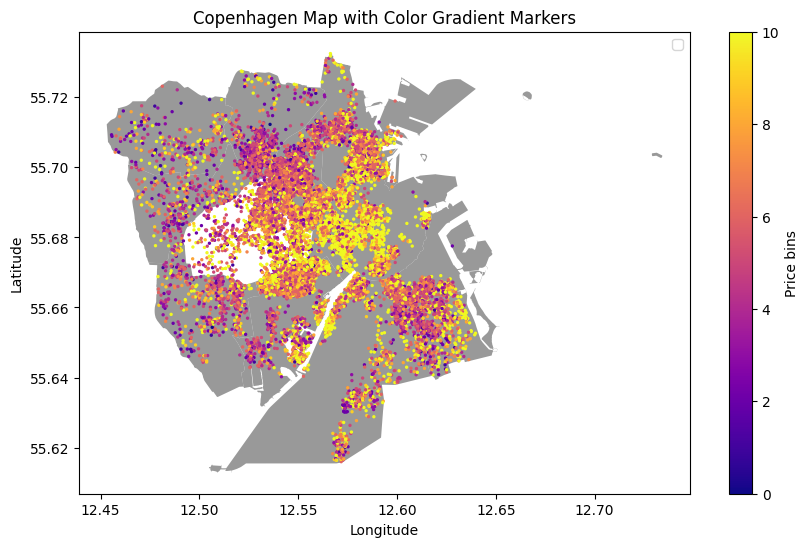

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Create a scatter plot of latitude and longitude
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Copenhagen map using geopandas
copenhagen.plot(ax=ax, alpha=0.8, color='gray')

# Create a scatter plot with a color gradient
scatter = ax.scatter(
    data_bins['longitude'],
    data_bins['latitude'],
    c=data_bins['price_bins'],
    cmap='plasma',  # You can change the colormap as desired
    marker='o',
    s=2,  # Adjust marker size as needed
)

# Add colorbar
plt.colorbar(scatter, label='Price bins')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Map with Color Gradient Markers')
plt.legend()
plt.show()

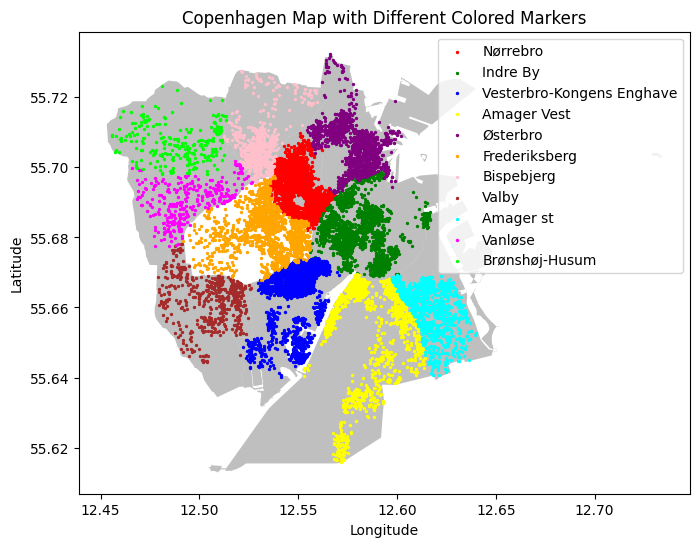

In [327]:
# Neigbourhood grouping
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# distinct neighbourhoods
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()
neighbourhood_colors = dict()
colors = ["red", "green", "blue", "yellow", "purple", "orange", "pink", "brown", "cyan", "magenta", "lime"]

# Load the Copenhagen GeoJSON data
copenhagen = gpd.read_file('bydel.json')

# Define colors for each category
for i, n in enumerate(neighbourhoods):
    neighbourhood_colors[n] = colors[i]

# Create a scatter plot with different colors for each category
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Copenhagen map using geopandas
copenhagen.plot(ax=ax, alpha=0.5, color='gray')

for neighbourhood, color in neighbourhood_colors.items():
    subset = data_bins[data_bins['neighbourhood_cleansed'] == neighbourhood]
    ax.scatter(
        subset['longitude'],
        subset['latitude'],
        color=color,
        label=neighbourhood,
        marker='o',
        s=2,  # Adjust marker size as needed
    )

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Copenhagen Map with Different Colored Markers')
plt.legend()
plt.show()

# 8 Boxplots

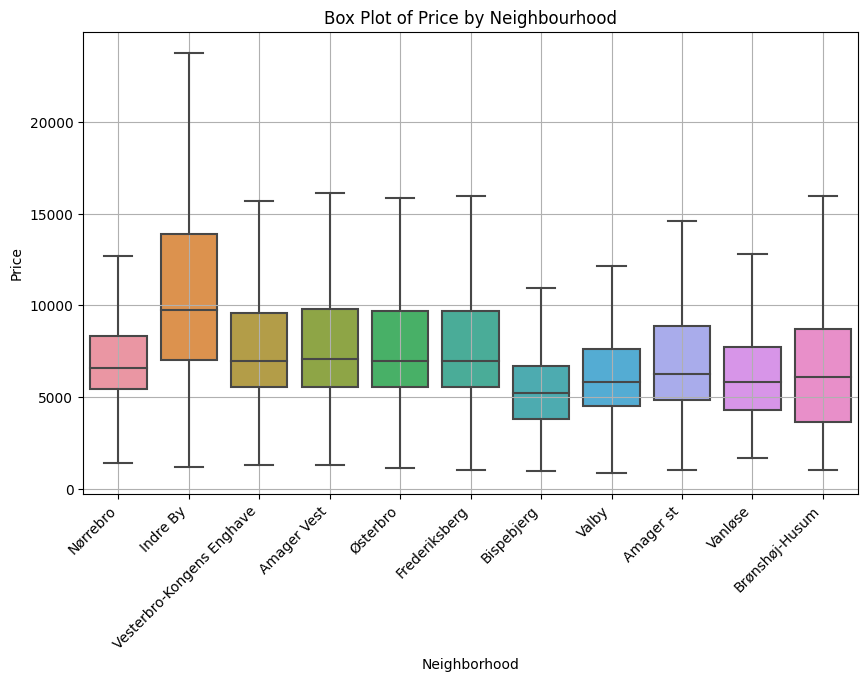

In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot grouped by 'neighborhood'
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=data_bins, showfliers=False)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Box Plot of Price by Neighbourhood')

# Show the plot
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

Shows that central cost more than everything else

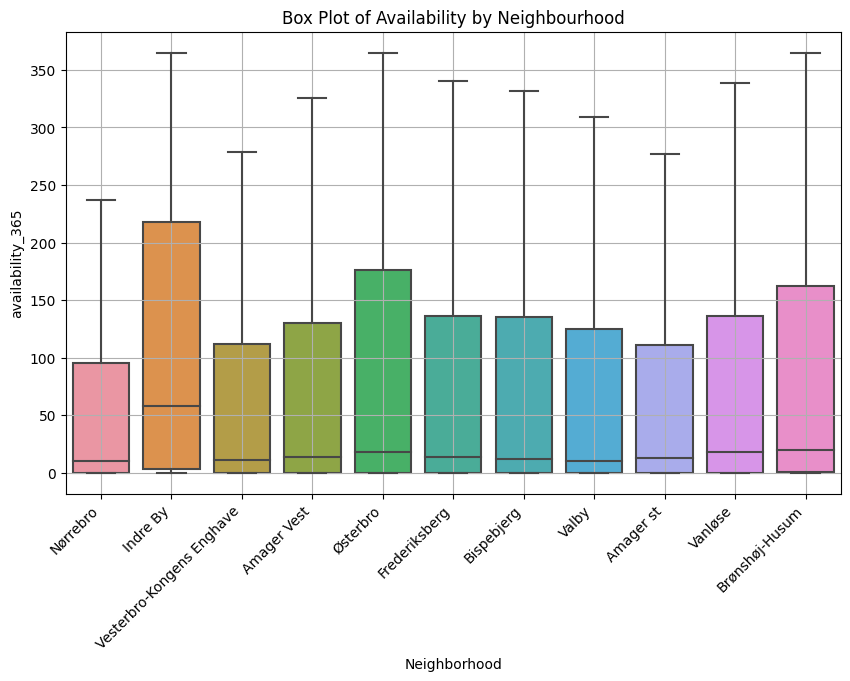

In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot grouped by 'neighborhood'
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_cleansed', y='availability_365', data=data_bins, showfliers=False)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('availability_365')
plt.title('Box Plot of Availability by Neighbourhood')

# Show the plot
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.show()

Higher price, more available

# 9 Bar chart

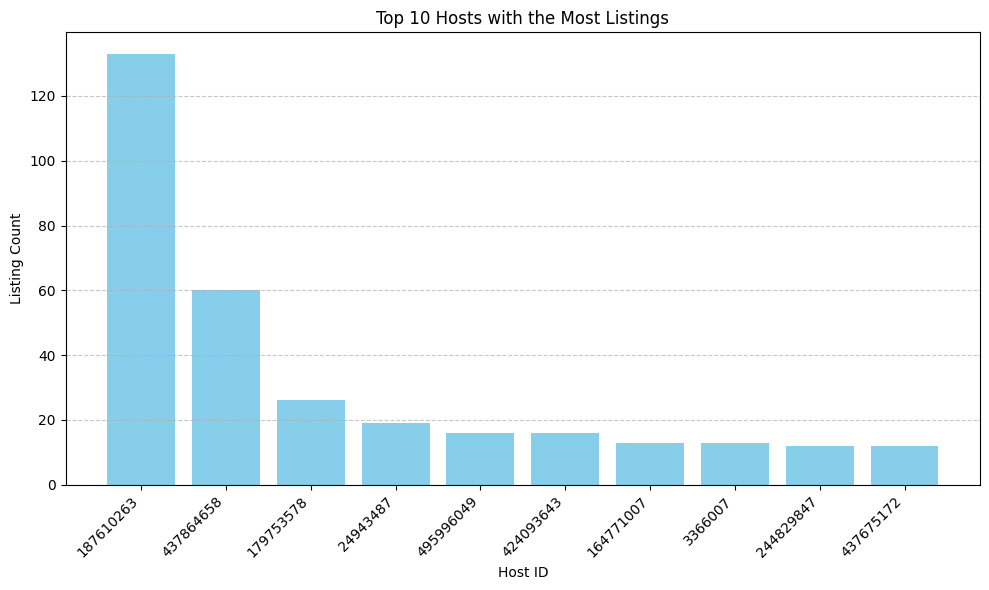

In [330]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of listings for each host
host_listing_counts = data_bins['host_id'].value_counts().reset_index()
host_listing_counts.columns = ['host_id', 'listing_count']

# Sort the hosts by listing count and select the top 10
top_hosts = host_listing_counts.nlargest(10, 'listing_count')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_hosts['host_id'].astype(str), top_hosts['listing_count'], color='skyblue')

# Add labels and title
plt.xlabel('Host ID')
plt.ylabel('Listing Count')
plt.title('Top 10 Hosts with the Most Listings')

# Customize the x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 10 Descriptive analysis

In [348]:
data_bins.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bins,price_group
count,1.399400e+04,1.399400e+04,13994.000000,13994.000000,1.399400e+04,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000,13994.000000
mean,2.568521e+17,1.128523e+08,55.680349,12.558890,8.466311e+03,4.322638,21.221452,4.813414,4.841000,4.692622,4.877501,4.909015,4.832732,4.717085,0.780202,3.357796,81.053023,6.693011,0.480063
std,3.496905e+17,1.392715e+08,0.018958,0.030788,1.262088e+04,15.655223,42.096737,0.279120,0.266582,0.393964,0.253155,0.218388,0.244315,0.320037,1.076764,17.352384,112.070689,2.485191,0.499620
min,6.983000e+03,1.171800e+04,55.615990,12.455520,8.813800e+02,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,2.006191e+07,1.426062e+07,55.666389,12.541550,5.413200e+03,2.000000,4.000000,4.740000,4.790000,4.560000,4.840000,4.900000,4.750000,4.610000,0.200000,1.000000,0.000000,5.000000,0.000000
50%,4.362059e+07,4.923078e+07,55.681506,12.555492,6.940000e+03,3.000000,9.000000,4.900000,4.920000,4.810000,4.970000,5.000000,4.910000,4.780000,0.430000,1.000000,15.000000,6.000000,0.000000
75%,6.484685e+17,1.620628e+08,55.695237,12.580430,9.716000e+03,4.000000,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.970000,1.000000,148.000000,9.000000,1.000000
max,9.224057e+17,5.212666e+08,55.732470,12.639720,1.043526e+06,1111.000000,1178.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,34.440000,174.000000,365.000000,10.000000,1.000000


In [350]:
data_bins.groupby('neighbourhood_cleansed')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Amager Vest,1247.0,8645.520305,14254.451775,1325.54,5527.71,7078.80,9771.52,450406.00
Amager st,1005.0,7608.270209,5104.539479,1013.24,4858.00,6246.00,8876.26,69400.00
Bispebjerg,627.0,6162.531834,12321.933760,971.60,3820.47,5205.00,6686.69,305360.00
Brønshøj-Husum,251.0,6809.052430,4241.903237,1041.00,3650.44,6086.38,8699.29,31007.92
Frederiksberg,1454.0,8630.858927,11837.924376,1041.00,5552.00,6967.76,9716.00,402520.00
Indre By,2108.0,11715.872277,12135.029090,1179.80,7037.16,9761.11,13880.00,439302.00
Nørrebro,2521.0,7633.840333,20974.088555,1429.64,5413.20,6593.00,8328.00,1043526.16
Valby,527.0,6589.826300,4042.356076,881.38,4511.00,5801.84,7634.00,55520.00
Vanløse,314.0,6469.848153,3486.383174,1686.42,4302.80,5826.13,7703.40,24984.00


In [331]:
# Not sure about this

neighbourhood_grouped_price = data_bins.groupby('neighbourhood_cleansed')['price']

mean = neighbourhood_grouped_price.mean()
mode = neighbourhood_grouped_price.apply(lambda x: x.mode().iloc[0])
median = neighbourhood_grouped_price.median()
std_dev = neighbourhood_grouped_price.std()
variance = neighbourhood_grouped_price.var()
min_value = neighbourhood_grouped_price.min()
max_value = neighbourhood_grouped_price.max()
quartiles = neighbourhood_grouped_price.quantile([0.25, 0.5, 0.75]).unstack()

summary_statistics = pd.concat([mean, mode, median, std_dev, variance, min_value, max_value, quartiles], axis=1)
summary_statistics.columns = ['Mean', 'Mode', 'Median', 'Std Dev', 'Variance', 'Min', 'Max', '25%', '50%', '75%']
summary_statistics

,Mean,Mode,Median,Std Dev,Variance,Min,Max,25%,50%,75%
neighbourhood_cleansed,,,,,,,,,,
Amager Vest,8645.520305,6940.0,7078.80,14254.451775,2.031894e+08,1325.54,450406.00,5527.71,7078.80,9771.52
Amager st,7608.270209,5552.0,6246.00,5104.539479,2.605632e+07,1013.24,69400.00,4858.00,6246.00,8876.26
Bispebjerg,6162.531834,5552.0,5205.00,12321.933760,1.518301e+08,971.60,305360.00,3820.47,5205.00,6686.69
Brønshøj-Husum,6809.052430,8328.0,6086.38,4241.903237,1.799374e+07,1041.00,31007.92,3650.44,6086.38,8699.29
Frederiksberg,8630.858927,6940.0,6967.76,11837.924376,1.401365e+08,1041.00,402520.00,5552.00,6967.76,9716.00
Indre By,11715.872277,10410.0,9761.11,12135.029090,1.472589e+08,1179.80,439302.00,7037.16,9761.11,13880.00
Nørrebro,7633.840333,6940.0,6593.00,20974.088555,4.399124e+08,1429.64,1043526.16,5413.20,6593.00,8328.00
Valby,6589.826300,5552.0,5801.84,4042.356076,1.634064e+07,881.38,55520.00,4511.00,5801.84,7634.00
Vanløse,6469.848153,5552.0,5826.13,3486.383174,1.215487e+07,1686.42,24984.00,4302.80,5826.13,7703.40


# 11 Top 10 rating

In [332]:
import folium

# Sort the DataFrame by 'review_scores_rating' in descending order and select the top 10
top_10_ratings = data_bins.nlargest(10, 'review_scores_rating')

# Create a Folium map centered around the first entry in the top 10
map_center = [top_10_ratings.iloc[0]['latitude'], top_10_ratings.iloc[0]['longitude']]
m = folium.Map(location=map_center, zoom_start=13)

# Add markers for the top 10 highest-rated entries
for index, row in top_10_ratings.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Rating: {row['review_scores_rating']}",
                  icon=folium.Icon(icon='star')).add_to(m)

# Save the map as an HTML file (optional)
m.save('top_10_ratings_map.html')

# Display the map
m

# 12 Preprocessing and feature engineering

In [333]:
# might come back here later

# remove outlies?
# more binning?
# more one hot encoding???
# check if it is needed to do log scaling if data is not normally distributed AKA Transformation
# at what step should it be done?
# try to use algorith to automatically find the most important features

# 13 Affordability

In [334]:
# Calculate the median price
median_price = data_bins['price'].median()

data_affordability = data_bins
# Create the 'price_group' column where 1 indicates above median, and 0 indicates below median
data_affordability['price_group'] = np.where(data_affordability['price'] > median_price, 1, 0)

print(median_price)

# Display the DataFrame
data_affordability.head()

6940.0


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_bins,price_group
0,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,Nørrebro,55.68641,12.54741,Entire home/apt,5572.82,3,...,4.78,4.86,4.89,4.73,4.71,1.03,1,0,5,0
1,26057,Home in Copenhagen · ★4.91 · 4 bedrooms · 4 be...,109777,Kari,Indre By,55.69307,12.57649,Entire home/apt,18044.00,7,...,4.96,4.93,4.86,4.94,4.81,0.51,1,261,10,1
2,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,9722.94,4,...,4.85,4.96,4.98,4.76,4.78,0.87,1,42,9,1
3,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,Nørrebro,55.69388,12.54725,Entire home/apt,5503.42,5,...,4.92,4.90,4.94,4.89,4.80,0.69,1,5,5,0
4,26473,Townhouse in Copenhagen · ★4.56 · 6 bedrooms ·...,112210,Julia,Indre By,55.67602,12.57540,Entire home/apt,23249.00,3,...,4.45,4.79,4.72,4.89,4.61,2.11,10,109,10,1


# 14 Models

In [335]:
# one hot encoding on neighbourhoods
df_encoded = pd.get_dummies(data_affordability, columns=['neighbourhood_cleansed'], prefix='Neighbourhood')

# should i be done on room type?
df_encoded = pd.get_dummies(df_encoded, columns=['room_type'], prefix='room_type')

print(df_encoded.columns)

# select what columns to keep
keep = ['review_scores_rating', 'price_bins', 'price_group', 
        'Neighbourhood_Amager Vest', 'Neighbourhood_Amager st',
       'Neighbourhood_Bispebjerg', 'Neighbourhood_Brønshøj-Husum',
       'Neighbourhood_Frederiksberg', 'Neighbourhood_Indre By',
       'Neighbourhood_Nørrebro', 'Neighbourhood_Valby',
       'Neighbourhood_Vanløse', 'Neighbourhood_Vesterbro-Kongens Enghave',
       'Neighbourhood_Østerbro', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room']

final_df = df_encoded[keep]
final_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_bins',
       'price_group', 'Neighbourhood_Amager Vest', 'Neighbourhood_Amager st',
       'Neighbourhood_Bispebjerg', 'Neighbourhood_Brønshøj-Husum',
       'Neighbourhood_Frederiksberg', 'Neighbourhood_Indre By',
       'Neighbourhood_Nørrebro', 'Neighbourhood_Valby',
       'Neighbourhood_Vanløse', 'Neighbourhood_Vesterbro-Kongens Enghave',
       'Neighbourhood_Østerbro', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


Index(['review_scores_rating', 'price_bins', 'price_group',
       'Neighbourhood_Amager Vest', 'Neighbourhood_Amager st',
       'Neighbourhood_Bispebjerg', 'Neighbourhood_Brønshøj-Husum',
       'Neighbourhood_Frederiksberg', 'Neighbourhood_Indre By',
       'Neighbourhood_Nørrebro', 'Neighbourhood_Valby',
       'Neighbourhood_Vanløse', 'Neighbourhood_Vesterbro-Kongens Enghave',
       'Neighbourhood_Østerbro', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [336]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Naïve Bayes

# Split data into features (X) and the target variable (y)
X = final_df.drop(columns=['price_group'])
y = final_df['price_group']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Perform 5-fold cross-validation (adjust the number of folds as needed)
# You can choose a different number of folds by modifying the cv parameter.
# Scoring can be 'accuracy', 'precision', 'recall', 'f1', etc., depending on your evaluation metric.
cv_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Accuracy: 0.8017148981779206
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1484
           1       0.73      0.93      0.81      1315

    accuracy                           0.80      2799
   macro avg       0.82      0.81      0.80      2799
weighted avg       0.83      0.80      0.80      2799

Cross-validation Scores: [0.80921758 0.89103251 0.82815291 0.8052876  0.82451751]
Mean Accuracy: 0.8316416232592003


In [340]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# k-Nearest Neighbor (k-NN)

# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['price_group'])
y = final_df['price_group']

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the k-NN classifier (you can adjust the number of neighbors)
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test.values) 
# Got an error here. had to follow this instruction to make it work:
# https://github.com/scikit-learn/scikit-learn/issues/26768#issuecomment-1676406055

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

/home/gimpe/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9974991068238657
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1484
           1       1.00      0.99      1.00      1315

    accuracy                           1.00      2799
   macro avg       1.00      1.00      1.00      2799
weighted avg       1.00      1.00      1.00      2799



In [347]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Split the data into features (X) and the target variable (y)
X = final_df.drop(columns=['price_group'])
y = final_df['price_group']

# Initialize and train the k-NN classifier (you can adjust the number of neighbors)
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Perform k-fold cross-validation (adjust the number of folds as needed)
# You can choose a different number of folds by modifying the cv parameter.
# Scoring can be 'accuracy', 'precision', 'recall', 'f1', etc., depending on your evaluation metric.
cv_scores = cross_val_score(knn_classifier, X.values, y.values, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.99857092 0.99678457 0.99535548 0.99714184 0.99499643]
Mean Accuracy: 0.9965698461183292


# 15 Conclusion

In [338]:
# :D 